# Ich hab mir hier richtig Mühe gegeben :D


[Zum Google-Drive, wo ihr eure Bilder hochladen könnt](https://drive.google.com/drive/folders/1_ZBb3fcsFzG69OGAO-sH6MpMNz8M2pOn?usp=sharing)

## Super Resolution (SR) – Grundlagen

<b>Ziel</b>:

Erhöhung der Bildauflösung aus niedrig aufgelösten Eingaben
Unterschied zu einfacher Interpolation: SR versucht echte Details zu rekonstruieren, nicht nur zu glätten

<b>Arten</b>:

Single Image SR (SISR) – nur ein Bild als Input
Multi Frame SR (MFSR) – mehrere leicht versetzte Bilder kombiniert


<b>Wichtig in</b>: Medizin, Satellitenbildern, Videoüberwachung, Gaming (z. B. DLSS)

<b>Herausforderungen</b>:
Rechenaufwand, Artefakte, Überanpassung
Modelle „raten“ Details – keine echte Information

Hohe Skalierungsfaktoren = schwierig

Auswahl:  ninasr


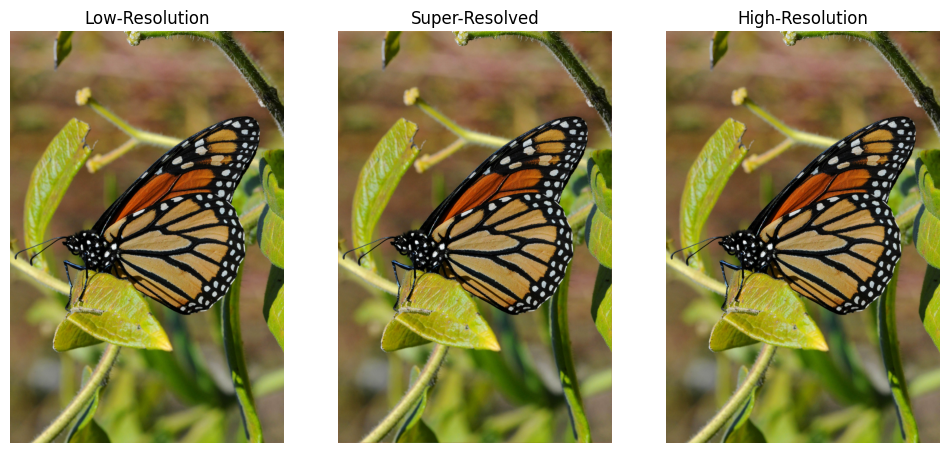

In [1]:
from torchsr.datasets import Div2K
from torchsr.models import ninasr_b0, edsr_baseline, rdn_a, carn_m, rcan_g10r20f64
from torchvision.transforms.functional import to_pil_image, to_tensor
import matplotlib.pyplot as plt
import torch

# Dataset laden
dataset = Div2K(root="./scripts/data", scale=2, download=False)
hr, lr = dataset[5]

# Modell laden
inputModel = input("Auswahl: ")
match(str(inputModel).lower()):
    case "ninasr":
        model = ninasr_b0(scale=2, pretrained=True)
    case "edsr":
        model = edsr_baseline(2, True)
    case "rdn":
        model = rdn_a(2,True)
    case "carn":
        model = carn_m(2, True)
    case "rcan":
        model = rcan_g10r20f64(2, True)

model.eval()

# Super-Resolution ausführen
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
lr_t = to_tensor(lr).unsqueeze(0).to(device)
with torch.no_grad():
    sr_t = model(lr_t)
sr = to_pil_image(sr_t.squeeze(0).cpu().clamp(0, 1))

# Bilder anzeigen
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(lr)
axs[0].set_title("Low-Resolution")
axs[1].imshow(sr)
axs[1].set_title("Super-Resolved")
axs[2].imshow(hr)
axs[2].set_title("High-Resolution")
for ax in axs: ax.axis("off")
plt.show() # hr.show(), lr.show(), sr.show()


-------------------

## Jetzt probieren wir mal unsere eigenen Dateien aus!

In [ ]:
import os
import gdown

folder_id = "1_ZBb3fcsFzG69OGAO-sH6MpMNz8M2pOn"
target_dir = "./scripts/google_drive_pictures"
os.makedirs(target_dir, exist_ok=True)

folder_url = f"https://drive.google.com/drive/folders/{folder_id}"

gdown.download_folder(url=folder_url, output=target_dir, quiet=False, use_cookies=False)

print(f"Alle Bilder wurden in '{target_dir}' heruntergeladen!")


Retrieving folder contents


Retrieving folder 15xLJD-jWjNi4GJYlyc-ETB0CjIs_BlOv Celina
Processing file 1Hfwo5fi68wtsQzaFYDfZDIKns874iioT IMG_1843.PNG
Processing file 1fLlY1i0HcThj38CBHlbuDA40BpT8IWvM IMG_9471.PNG
Processing file 1Y9YDk-SW7wRx2vzKGi71LYN5LMKSMhYc super_nova.PNG
Retrieving folder 16UWlwLs4HEgjkb7nzTSmHioVC-qNHfiP Deniz
Retrieving folder 1WyyBWgKN2Dd6-XzBWi_KgIh_JzUgZuQL Felix
Processing file 1xwIkI5uKwg_MiH9h-vdhZfbtVHik3-fx E_071.jpg
Processing file 1cTEUhYX-W0NlDr8B-1_fBBG8A_73E6s9 E_072.jpg
Processing file 1vMcm7h126LuS-PUc2897IwGBP-T8oAVa E_073.jpg
Processing file 1T0UyqsShM2JgK1psK-CE8h7k5WT8sZW9 E_149.jpg
Processing file 1vKT7kDN_CH65EOK3znWJWVs6uznjlGJ6 E_165.jpg
Processing file 1QMHl0rE4p5OaG9zIkc2ASgIzGsdAwr_j E_194.jpg
Processing file 1eciHFGfh1Hf0BipNlBH9eQhK2wDDc5eB E_199.jpg
Processing file 1lLuI-xlhU3Jqba0eMGloWGRwakvhHoP9 E_202.jpg
Processing file 1AZ4reQFtshEjyGTyFHS4P5FO5-8sVXdQ E_249.jpg
Processing file 1XuM9UStHlqcq0kzUDBNQIhqnIEba_qKs E_268.jpg
Processing file 1i6gHIt-vmw3l-XnH9

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Hfwo5fi68wtsQzaFYDfZDIKns874iioT
To: /home/yannikl/dev/thb/pst/PST-TorchSR/scripts/google_drive_pictures/Celina/IMG_1843.PNG
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 973k/973k [00:19<00:00, 49.7kB/s]
Downloading...
From: https://drive.google.com/uc?id=1fLlY1i0HcThj38CBHlbuDA40BpT8IWvM
To: /home/yannikl/dev/thb/pst/PST-TorchSR/scripts/google_drive_pictures/Celina/IMG_9471.PNG
 44%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                                        | 4.19M/9.53M [02:46<04:58, 17.9kB/s]

# Und unser tolles Skript :D


In [ ]:
from pathlib import Path
from PIL import Image
from torchvision.transforms.functional import to_tensor, to_pil_image
import torch
from torchsr.models import ninasr_b0
import matplotlib.pyplot as plt

image_dir = Path("./scripts/google_drive_pictures/Celina")
image_paths = list(image_dir.rglob("*.png")) + list(image_dir.rglob("*.jpg"))

print(f"Gefundene Bilder: {len(image_paths)}")

# 2️⃣ Modell laden
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ninasr_b0(scale=2, pretrained=True).to(device)
model.eval()

# 3️⃣ Schleife über Bilder
for img_path in image_paths:
    lr = Image.open(img_path).convert("RGB")
    
    # SR ausführen
    lr_t = to_tensor(lr).unsqueeze(0).to(device)
    with torch.no_grad():
        sr_t = model(lr_t)
    sr = to_pil_image(sr_t.squeeze(0).cpu().clamp(0, 1))
    
    # Ergebnis anzeigen
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].imshow(lr)
    axs[0].set_title("Original / LR")
    axs[0].axis("off")
    
    axs[1].imshow(sr)
    axs[1].set_title("Super-Resolved")
    axs[1].axis("off")
    
    plt.suptitle(img_path.name)
    plt.show()


Wer selbst noch ein bisschen rumbasteln will: MR an https://github.com/yanniyaze/PST-TorchSR ;)